### ----------------------------------------------------------------------------------------------------------------------
### This program, all of it runs, except the last line, where i make an attempt to plot 2 features on a region
###  This was in the first stage of development to become familiar with vectorizers, Tokenization + features
###  See other programs post stage 1.    Alemi 04/15/2020
###  ------------------------------------------------------------------------------------------------------------------------
###  Fix the plot!

In [1]:
import numpy as np

# **CountVectorizer**

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# COUNT VECTORIZER TAKES AN ARRAY OF TEXT DATA, WHICH CAN BE DOCUMENTS OR SENTENCES AND CONSTRUCTS THE BAG-OF-WORDS MODEL FOR US
# Note CountVectorizer is an  instance of some type. We need to initialize that instance first before we apply the .fit_transform(docs) Alemi 04/07/2020
count=CountVectorizer()


In [4]:
import numpy as np 
# Note there are 4 lines in Docs which is really 3 documents. Each document is separated by a ",". So the frequency of occurance for the word "is" = 3 for the 3rd document
# 1 for the first and 1 for the second document. The word "is" occurs max = 3. It also occurs in every document. 
docs = np.array(['The sun is shining on Zhongping',
                 'The weather is sweet',
                 'The sun is shining, the weather is sweet,'
                 'and one and one is two'])


In [5]:
# Transforming Words into Feature Vectors 
bag = count.fit_transform(docs)

In [6]:
print(count.vocabulary_)

{'the': 7, 'sun': 5, 'is': 1, 'shining': 4, 'on': 2, 'zhongping': 10, 'weather': 9, 'sweet': 6, 'and': 0, 'one': 3, 'two': 8}


In [7]:
# Each index position in the feature vectors shown here corresponds to the integer values that are stored as dictionary items in the CountVectorizer vocabulary
# For example, the first feature at index position 0 resembles the count of the word 'and' which only occurs in the last document. Zhongping occurs on index 10,
# recall our index starts with zero, and it (Zhongping) only occurs once! in the first document. We call these feature vectors: Raw Term Frequencies: tf(t,d) -
# the number of times a term t occurs in a document d. The sequence of items in the bag-of-words model we just created is also called the 1-gram or unigram model -
# Each item or token in the vocabulary represents a single word. More generally, the contigious sequences of items in NLP - words, letters, or symbols - are also called
# n-grams. 
# In 1-gram, we will have 1-gram: "The", "Sun", "is", "Shining"
# In 2-gram: "The sun", "Sun is", "is Shining"
# We could have initialized our CountVectorizer instance with ngram_range=(2,2)
print(bag.toarray())

[[0 1 1 0 1 1 0 1 0 0 1]
 [0 1 0 0 0 0 1 1 0 1 0]
 [2 3 0 2 1 1 1 2 1 1 0]]


In [8]:
# Let us capture the inverse of document frequency: idf(t,d) = log n/(1+df(d,t)) - where n is the number of our documents. Log is a weight and f(d,t) was explained before!
# Another transformer from scikit-learn library is TfidTransformer class, that takes the term frequencies from CountVectorizer class as input and transforms them into tf-idfs
!pip show tensorflow


Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages
Requires: numpy, opt-einsum, tensorboard, google-pasta, gast, termcolor, grpcio, wheel, six, tensorflow-estimator, scipy, keras-applications, keras-preprocessing, protobuf, astor, wrapt, absl-py
Required-by: 


In [9]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

/bin/sh: apt-get: command not found


In [10]:
# from sklearn.feature_extraction.text import TfidTransformer
!apt-get -qq install -y libfluidsynth1

/bin/sh: apt-get: command not found


In [11]:
#from sklearn.feature_extraction.text import TfidTransformer
!pip install tf-nightly

In [12]:
#from sklearn.feature_extraction.text import TfidTransformer
from sklearn.feature_extraction.text import TfidfTransformer

In [13]:
#  Tf is “n” (natural) by default, “l” (logarithmic) when sublinear_tf=True. 
#  Idf is “t” when use_idf is given, “n” (none) otherwise. 
#  Normalization is “c” (cosine)
#  when norm='l2', “n” (none) when norm=None.
tfidf = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)

In [14]:
np.set_printoptions(precision=2)

In [15]:
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.3  0.51 0.   0.39 0.39 0.   0.3  0.   0.   0.51]
 [0.   0.43 0.   0.   0.   0.   0.56 0.43 0.   0.56 0.  ]
 [0.5  0.45 0.   0.5  0.19 0.19 0.19 0.3  0.25 0.19 0.  ]]


In [16]:
# The word 'is' has a frequency of 3 (tf=3) in the third document, and the document frequency of this term is also 3 since the term "is" occurs in all three documents (df=3)
#. Thus, we can calculate  the inverse document frequency as follows: idf("is",d3) = log(1+3)/(1+3) = 0, and the tf-idf (termFrequency-inverseDocumentFrequency) 
#  tf-idf("is",d3)=3 * (0+1) =3. Note this value is different than the above derived tf-idf(d3), as the above values in the final step is L2-normalized.
# lets clean our data by excluding unwanted characters!

In [17]:
#import pyprind
import tarfile
!pip install -q matplotlib-venn

In [18]:
#with tarfile.open('https://www.kaggle.com/aaron7sun/stocknews#Combined_News_DJIA.csv') as tar:
#  tar.extractall()
import numpy as np

In [19]:
np.random.seed(0)
!pip install pyprind
import pyprind
import pandas as pd
import os

# **Access Kaggle**


In [20]:
# Install Kaggle library
!pip install -q kaggle
!pip install kaggle

In [21]:
#!mkdir ~/.kaggle
#!cp Downloads/kaggle.json ~/.kaggle/kaggle.json

In [22]:
!kaggle datasets download -d aaron7sun/stocknews

stocknews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!kaggle datasets download -d aaron7sun/stocknews

stocknews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
ls

Alemi2_final_project.ipynb
Combined_News_DJIA.csv*
Combined_News_DJIA.xls
D11ScikitLearnBayes.pdf
Final_NLTK_Latent.ipynb
Linear_Visualization_Graph.ipynb
Naive_Visualization_Graph-Copy1.ipynb
Naive_Visualization_Graph.ipynb
RedditNews.csv*
TensorFlow.ipynb
Tony Holdroyd - Tensorflow 2.0 Quick Start Guide (2019, Packt Publishing).pdf
Untitled.ipynb
alemi2_NLTK.ipynb
alemi_NLTK.ipynb
alemi_final_project-Copy1.ipynb
alemi_final_project.ipynb
alemi_final_project2.ipynb
kaggle.json
plot_logistic.ipynb
report.txt
stocknews/
stocknews.zip
upload_DJIA_table.csv*


In [25]:
#pd.read_csv("stocknews/RedditNews.csv")
#!unzip stocknews.zip -d ~/.kaggle

In [26]:
#df=pd.read_csv('stocknews.zip', compression='zip', header=0, sep=',', quotechar='"')
rNews=pd.read_csv('RedditNews.csv')
rNews.head()


,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [27]:
dNews=pd.read_csv('Combined_News_DJIA.csv')
dNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [28]:
# we need to clean yje "'" and \ and all punctuation marks like b" which are HTML makups
# to accomplish this, we will use Python's regular expression (regex) library re as shown below
import re


In [29]:
# We will remove all the non-word characters from the text via the regex [\w] + and convert the text into lower characters
def preprocessor(text):
    
    text = (re.sub('[\W]+',' ', text.lower() + ''))
    text = re.sub("b ",' ',text)
    return text

In [30]:
dNews['Top1'] = dNews['Top1'].apply(preprocessor)

In [31]:
dNews['Top1'].head()

0     georgia downs two russian warplanes as countr...
1     why wont america and nato help us if they won...
2     remember that adorable 9 year old who sang at...
3     u s refuses israel weapons to attack iran rep...
4     all the experts admit that we should legalise...
Name: Top1, dtype: object

In [32]:
dNews.loc[0,'Top1'][0:]

' georgia downs two russian warplanes as countries move to brink of war '

# **Tokenization**

In [33]:
def tokenizer(text):
  return text.split()


In [34]:
tokenizer(dNews['Top1'][0])

['georgia',
 'downs',
 'two',
 'russian',
 'warplanes',
 'as',
 'countries',
 'move',
 'to',
 'brink',
 'of',
 'war']

In [35]:
# install NTLK see www.ntlk.org/book/ in advanced applications in NLP
#  We will use Porter stemmer's algorim - 1979, which is word stemming
!pip install nltk

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
porter = PorterStemmer()

In [38]:
def tokenizer_porter(text):
  return [porter.stem(word) for word in text.split()]

In [39]:
tokenizer_porter(dNews['Top1'][0])

['georgia',
 'down',
 'two',
 'russian',
 'warplan',
 'as',
 'countri',
 'move',
 'to',
 'brink',
 'of',
 'war']

In [40]:
# Stopwords are simply those words that are extremely common but bear no use for our analysis!
# like is, and, has, like,,,, we will use 127 stopwords already available in the NTLK library which we get by downloading it
import nltk


In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Load and apply the stopwards after download
from nltk.corpus import stopwords

In [43]:
stop = stopwords.words('english')

In [44]:
[w for w in tokenizer_porter(dNews['Top1'][0]) if w not in stop]

['georgia', 'two', 'russian', 'warplan', 'countri', 'move', 'brink', 'war']

In [45]:
# Training a logistic regression model for Document Classification
# Here we train a logistic 

# **Training a Logistic Regression on Document Classification - Alemi 04/07/2020**



In [46]:
# we will use 
#dNews.head()

# Select the Test & Train Data

In [47]:
#. This should run on cleaned data, Note i have solely cleaned only row [0], we have to run the above code on all rows!!!!!!!
#. So this code is solely is for a placeholder, after the data is fully cleaned, then we run this part...Alemi 04/07/2020
X_train = dNews.loc[:1000,"Top1"].values
X_train.shape
#print(X_train)

(1001,)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer=CountVectorizer()
tfidf=TfidfVectorizer()

In [50]:
X_train_tf =tfidf.fit_transform(X_train)
X_train_tf.shape
#print(X_train_tf)
#print(X_train_tf)

(1001, 5040)

In [51]:
y_train= dNews.loc[:1000,"Label"].values
y_train.shape
#print(y_train)

(1001,)

In [52]:
#test = old_count_vectorizer.transform(test)
#tfidf_data = old_tfidf_transformer.transform(test)

In [53]:
X_test = dNews.loc[1001:,"Top1"].values
X_test.shape

(988,)

In [54]:
X_test_tf =tfidf.transform(X_test)
X_test_tf.shape

(988, 5040)

In [55]:
y_test= dNews.loc[1001:,"Label"].values
y_test.shape

(988,)

In [56]:
from sklearn.model_selection import train_test_split
# X,y =  dNews.iloc[:, 2:].values, dNews.iloc[:, 1].values


In [57]:
# X_train, X_test, y_train, y_test =\
#    train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

# Imports from SkLearn

In [58]:
# like our class exercise we run the GridSearch to find the optimal set of parameters
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)

# **Clean the Text Data**

In [63]:
dNews['Top1']

0        georgia downs two russian warplanes as countr...
1        why wont america and nato help us if they won...
2        remember that adorable 9 year old who sang at...
3        u s refuses israel weapons to attack iran rep...
4        all the experts admit that we should legalise...
                              ...                        
1984    barclays and rbs shares suspended from trading...
1985    2 500 scientists to australia if you want to s...
1986                     explosion at airport in istanbul
1987    jamaica proposes marijuana dispensers for tour...
1988    a 117 year old woman in mexico city finally re...
Name: Top1, Length: 1989, dtype: object

In [64]:
#import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
from nltk.corpus import stopwords

In [66]:
stop=stopwords.words('english') + [None]

In [67]:
tokenizer_porter(dNews['Top1'][0])

['georgia',
 'down',
 'two',
 'russian',
 'warplan',
 'as',
 'countri',
 'move',
 'to',
 'brink',
 'of',
 'war']

In [68]:
[w for w in tokenizer_porter(dNews['Top1'][0]) if w not in stop]

['georgia', 'two', 'russian', 'warplan', 'countri', 'move', 'brink', 'war']

# **Transforming words into feature vectors**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
cv = CountVectorizer(stop_words='english')

In [71]:
#count=CountVectorizer

In [72]:
#docs=np.array(dNews['Top1'])

In [73]:
vectorizer = TfidfVectorizer(stop_words='english')

### Bag of Words indices +  Vectorized + stop_words

In [74]:
# This is my bag of words based on the word count in the respective document, takes an array of texts and counts its words
bagX_test=vectorizer.fit_transform(X_test)
print(vectorizer.vocabulary_)


{'germany': 2041, 'breaks': 710, '25': 79, 'renewable': 3830, 'energy': 1654, 'barrier': 550, 'produced': 3582, '67': 147, 'billion': 610, 'kwh': 2613, '1st': 50, '2012': 58, 'increase': 2376, '19': 41, 'year': 5030, 'world': 5001, 'market': 2839, 'power': 3507, 'converted': 1137, 'solar': 4224, 'radiation': 3703, 'installed': 2433, 'capacity': 810, 'accounts': 224, 'global': 2056, 'total': 4602, 'grids': 2107, 'fail': 1788, 'leaving': 2668, '600': 137, 'million': 2948, 'india': 2385, 'american': 343, 'embassy': 1625, 'norway': 3149, 'forgot': 1937, 'practise': 3513, 'bom': 671, 'called': 777, 'norwegian': 3150, 'squad': 4286, 'obama': 3166, 'authorizes': 498, 'secret': 4068, 'support': 4421, 'syrian': 4462, 'rebels': 3745, 'reuters': 3894, 'china': 926, 'rich': 3910, 'powerful': 3509, 'hire': 2236, 'body': 666, 'doubles': 1506, 'prison': 3566, 'time': 4575, 'nasa': 3068, 'curiosity': 1234, 'rover': 3962, 'successfully': 4392, 'landed': 2623, 'mars': 2845, 'pictures': 3397, 'expected':

In [75]:
bagX_train=vectorizer.fit_transform(X_train)
print(vectorizer.vocabulary_)

{'georgia': 1907, 'downs': 1439, 'russian': 3759, 'warplanes': 4654, 'countries': 1092, 'brink': 671, 'war': 4647, 'wont': 4748, 'america': 284, 'nato': 2914, 'help': 2067, 'did': 1336, 'iraq': 2343, 'remember': 3617, 'adorable': 205, 'year': 4784, 'old': 3023, 'sang': 3790, 'opening': 3034, 'ceremonies': 834, 'fake': 1679, 'refuses': 3583, 'israel': 2358, 'weapons': 4682, 'attack': 400, 'iran': 2340, 'report': 3639, 'experts': 1636, 'admit': 201, 'legalise': 2536, 'drugs': 1464, 'mom': 2837, 'missing': 2820, 'gay': 1894, 'man': 2693, 'bad': 453, '21': 61, 'cheerleader': 857, 'looking': 2632, 'afghan': 221, 'prison': 3364, 'majority': 2678, 'female': 1722, 'prisoners': 3366, 'serving': 3897, '20': 49, 'sentences': 3886, 'victims': 4585, 'rape': 3510, 'arrested': 361, 'locked': 2618, 'hours': 2145, 'taking': 4266, 'photo': 3210, 'police': 3281, 'van': 4564, 'ignoring': 2188, 'entry': 1567, 'sign': 3960, 'elderly': 1516, 'chinese': 869, 'women': 4744, 'sentenced': 3885, 'education': 1502

In [76]:
bagX_test.shape, bagX_train.shape

((988, 5056), (1001, 4808))

In [77]:
# This is my bag of words based on the word count in the respective document, takes an array of texts and counts its words
bag=vectorizer.fit_transform(dNews['Top1'])
print(vectorizer.vocabulary_)
bag.shape


{'georgia': 3031, 'downs': 2259, 'russian': 5928, 'warplanes': 7294, 'countries': 1736, 'brink': 1070, 'war': 7283, 'wont': 7430, 'america': 494, 'nato': 4602, 'help': 3286, 'did': 2103, 'iraq': 3718, 'remember': 5696, 'adorable': 369, 'year': 7489, 'old': 4782, 'sang': 5976, 'opening': 4798, 'ceremonies': 1307, 'fake': 2674, 'refuses': 5646, 'israel': 3741, 'weapons': 7329, 'attack': 683, 'iran': 3714, 'report': 5726, 'experts': 2607, 'admit': 361, 'legalise': 3997, 'drugs': 2301, 'mom': 4475, 'missing': 4448, 'gay': 3007, 'man': 4219, 'bad': 758, '21': 102, 'cheerleader': 1356, 'looking': 4128, 'afghan': 393, 'prison': 5323, 'majority': 4194, 'female': 2743, 'prisoners': 5325, 'serving': 6119, '20': 81, 'sentences': 6106, 'victims': 7194, 'rape': 5541, 'arrested': 615, 'locked': 4108, 'hours': 3400, 'taking': 6677, 'photo': 5067, 'police': 5180, 'van': 7158, 'ignoring': 3473, 'entry': 2486, 'sign': 6217, 'elderly': 2392, 'chinese': 1373, 'women': 7425, 'sentenced': 6105, 'education':

(1989, 7527)

In [78]:
bag.shape

(1989, 7527)

In [79]:
print(bag.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [80]:
bagArray=bag.toarray()

In [81]:
bagArray.shape

(1989, 7527)

In [82]:
# Create a length column to be used as a future feature 
#for i in range(0, len(dNews)):
#    dNews.length[i] = len(dNews.iloc[i])
#dNews.head()

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
tfidf=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)

In [85]:
np.set_printoptions(precision=2)

### TfidTransformer class, takes the raw term frequencies from TfidVectorizer class as input and
###  transforms them into tf-idfs


In [86]:
print(tfidf.fit_transform(vectorizer.fit_transform(dNews['Top1'])).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [87]:
dNews_tf =tfidf.fit_transform(vectorizer.fit_transform(dNews['Top1']))
dNews_tf.shape

(1989, 7527)

In [88]:
#X_train_tf =tfidf.fit_transform(vectorizer.fit_transform(X_train))
X_train_tf.shape

(1001, 5040)

In [89]:
#X_test_tf =tfidf.fit_transform(vectorizer.fit_transform(X_test))
X_test_tf.shape

(988, 5040)

In [90]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((988,), (988,), (1001,), (1001,))

In [91]:
# Fit the classifier
from sklearn import linear_model

In [92]:
# The expit function, also known as the logistic sigmoid function, is defined as expit(x) = 1/(1+exp(-x)). 
# It is the inverse of the logit function.
from scipy.special import expit

In [93]:
#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X_train_tf, y_train)
clf.coef_
clf.score(X_train_tf, y_train)

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [94]:
#-------------------------------------------------------------------------------------

#X=X_train_tf
#.                 I T          H A S          SEEN    THE.    DATA.   ??????????
#-------------------------------------------------------------------------------------
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X_test_tf, y_test)
clf.coef_
clf.score(X_test_tf, y_test)

0.9989878542510121

In [95]:
clf

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Naive Bayes Model: BernoulliNB

In [97]:
from sklearn.naive_bayes import BernoulliNB

In [98]:
from sklearn.feature_extraction.text import CountVectorizer


In [99]:
print(X_train_tf)

  (0, 4853)	0.22792892201180157
  (0, 3137)	0.1025347432785759
  (0, 712)	0.3802090036555188
  (0, 4564)	0.09533057700673112
  (0, 2985)	0.3319339583856534
  (0, 1141)	0.3319339583856534
  (0, 395)	0.18925954129984127
  (0, 4860)	0.3802090036555188
  (0, 3912)	0.2644475839999778
  (0, 4671)	0.2644475839999778
  (0, 1492)	0.3802090036555188
  (0, 1990)	0.31420682016423046
  (1, 2446)	0.1795641894485897
  (1, 2320)	0.06980503378630495
  (1, 4514)	0.15359929563994384
  (1, 4887)	0.13486009581756692
  (1, 1386)	0.194616725348384
  (1, 3105)	0.1493351873479981
  (1, 4522)	0.13173235930668914
  (1, 2282)	0.15359929563994384
  (1, 4750)	0.2599697574489796
  (1, 2157)	0.5386925683457692
  (1, 3037)	0.23204469063577404
  (1, 313)	0.07861741888779643
  (1, 297)	0.194616725348384
  :	:
  (999, 785)	0.22894320373961627
  (999, 4582)	0.2115921567768079
  (999, 3494)	0.1886420698573275
  (999, 1914)	0.19968576330487225
  (999, 1142)	0.18676908690864932
  (999, 1924)	0.25042603427435833
  (999, 2129)

In [100]:
vectorizer = CountVectorizer()

In [101]:
#X = vectorizer.fit_transform(X_train)

In [102]:
naive_bayes = BernoulliNB()

In [103]:
# from sklearn.model_selection import train_test_split

In [104]:
# binarizefloat or None, optional (default=0.0)
# Threshold for binarizing (mapping to booleans) of sample features. 
# If None, input is presumed to already consist of binary vectors.
naive_bayes.fit(X_train_tf, y_train)
#X.shape

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [105]:
#X_test2 = naive_bayes.transform(X_test)


In [106]:
#clf = BernoulliNB()
#clf.fit(X, y_train)

In [107]:
predictions = naive_bayes.predict(X_test_tf)
naive_bayes.score(X_test_tf, y_test)

0.5394736842105263

In [108]:
naive_bayes.score(X_train_tf, y_train)

0.926073926073926

In [109]:
predictions



array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [110]:
param_grid =[{'vect_ngram_range': [(1,1)],
              'vect_stop_words': [stop, None],
              'vect_topkenizer': [tokenizer,tokenizer_porter],
              'clf_penalty':['l1','l2'],
              'clf_C':[1.0,10.0,100.0]}]
              

In [111]:
# lr_tfidf = Pipeline([('vect',tfidf),('clf',LogisticRegression(random_state=0))])

In [112]:
# gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=1)

In [113]:
#gs_lr_tfidf.fit(X_train, y_train)

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [115]:
stdsc = StandardScaler()
MaxAbs = MaxAbsScaler()

In [116]:
X_train_std = MaxAbs.fit_transform(X_train_tf)

In [117]:
X_test_std = MaxAbs.transform(X_test_tf)
# print(X_test_std)

In [118]:
naive_bayes.fit(X_train_std, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [119]:
predictions = naive_bayes.predict(X_test_std)

In [120]:
naive_bayes.score(X_test_std, y_test)

0.5394736842105263

In [121]:
naive_bayes.score(X_train_std, y_train)

0.926073926073926

## OUR MISSCLASSIFICATIONS

In [122]:
from sklearn.linear_model import Perceptron

In [123]:
# The learning rate eta and the number of epochs (n_iter, or here max_iter so it will run are our hyper parameters)
# meaning we set!
ppn = Perceptron(max_iter=20, eta0=0.01, random_state=1, verbose=1, n_jobs=1)

In [124]:
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.56, NNZs: 3186, Bias: 0.000700, T: 1001, Avg. loss: 0.006885
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.66, NNZs: 3925, Bias: 0.000800, T: 2002, Avg. loss: 0.002999
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.69, NNZs: 4125, Bias: 0.000500, T: 3003, Avg. loss: 0.000708
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.70, NNZs: 4179, Bias: 0.000200, T: 4004, Avg. loss: 0.000156
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.71, NNZs: 4239, Bias: 0.000300, T: 5005, Avg. loss: 0.000072
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.72, NNZs: 4246, Bias: 0.000300, T: 6006, Avg. loss: 0.000024
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.72, NNZs: 4248, Bias: 0.000400, T: 7007, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.72, NNZs: 4248, Bias: 0.000400, T: 8008, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=20, n_iter_no_change=5, n_jobs=1,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=1, warm_start=False)

In [125]:
y_pred = ppn.predict(X_test_std)

In [126]:
print('Misclassified samples %d' % (y_test != y_pred).sum())

Misclassified samples 508


In [127]:
#            USE CONFUSION MATRIX.   ??????????????????
#plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Number of updates')
#plt.show

# Support vector machine linear classifier

In [130]:
!pip install mlxtend  

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid t

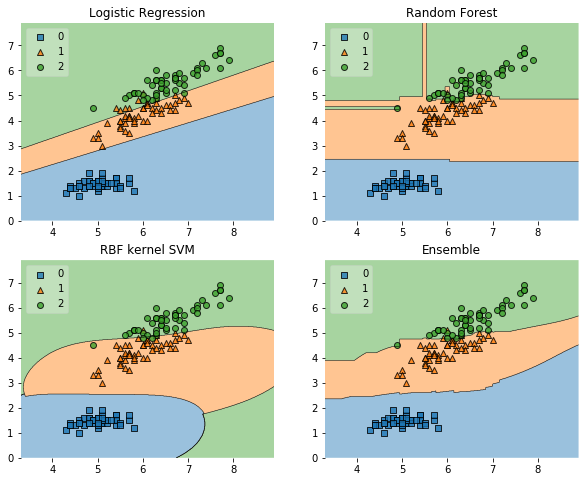

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')


# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [132]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets

In [133]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X, y)

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [134]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.10, C=10.0)

In [135]:
svm.fit(X_train_tf, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [137]:
#plot_decision_regions(X_train_tf, y_train, classifier=svm)

In [138]:
value=1.5
width=0.75

fig = plot_decision_regions(X_train_tf.values, y_train.values, clf=clf,
              feature_index=[0,2],                        #these one will be plotted  
              filler_feature_values={1: value, 3:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width})

AttributeError: values not found

In [288]:
X_train_std.shape[1]

5040